# Assignment 2: Scale-Space Blob Detection

### The goal of this assignment is to implement a Laplacian blob detector

Noel Mrowiec
10/1/2024
mrowiec3

In [77]:
# Libraries you will find useful
import numpy as np
import scipy 
import skimage
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps 

In [78]:
# Function to globally normalize a 2D array to the range [0, 1] 
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [79]:

# load each image 
dir_path = "images/"
images = []     #color images
filenames = []
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):
        filenames.append(filename)
        img_path = os.path.join(dir_path, filename)
        img = Image.open(img_path)
        #img.show()  # This will display the image
        
        # convert images to grayscale
        img_gs = ImageOps.grayscale(img) 
        #img_gs.show()
        img_gs = np.array(img_gs).astype(float)
        img_gs = normalize(img_gs)
        images.append(img_gs)
        

print(f"Loaded {len(images)} images")

Loaded 4 images


In [80]:
def get_sigma(k):
    return (2 ** k)

In [81]:

# for applying the Laplacian filter
from scipy.ndimage.filters import gaussian_laplace
def laplacian_gaussian(image, N = 10):
    scale_space = np.empty((image.shape[0],image.shape[1],N))

    for k in range(N):
        sigma = get_sigma(k)

        lap_gaus = gaussian_laplace(image, sigma, mode='nearest') 
        scale_norm_LoG = (sigma ** 2) * lap_gaus                                                      #scale normalized
        scale_space[:,:,k] = scale_norm_LoG

    return scale_space

/tmp/ipykernel_39506/3886021001.py:2: DeprecationWarning: Please import `gaussian_laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_laplace


In [82]:
from scipy.ndimage.filters import rank_filter

def non_max_suppression(array):
    local_max = rank_filter(array, rank=-1, size=3)

    # Only keep the pixels that are local maxima
    result = np.where(array == local_max, array, 0)
    return result

/tmp/ipykernel_39506/961410612.py:1: DeprecationWarning: Please import `rank_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import rank_filter


In [83]:
def get_xy_coordinates(image):
    # Get the coordinates of non-zero values
    non_zero_coords = np.nonzero(image)
    
    return non_zero_coords[0], non_zero_coords[1]


In [84]:
N = 10
x_coordinates = np.empty(0)
y_coordinates = np.empty(0)
radii = np.empty(0)

for image in images:
    scale_space = laplacian_gaussian(image)
    for k in range(N):
        blob_map = non_max_suppression(scale_space[:,:, k])
        x, y = get_xy_coordinates(blob_map)

        to_append_x = np.full(x.shape[0], k)
        to_append_y = np.full(y.shape[0], k)

        np.append(x_coordinates, to_append_x)
        np.append(y_coordinates, to_append_y)

        # add same number of radii as number of found coordinates
        np.append(radii, np.full(k, get_sigma(k)))

In [85]:





# filtering the image (two implementations)
# one that increases filter size, and one that downsamples the image
# For timing, use time.time()



# nonmaximum suppression in scale space
# you may find functions scipy.ndimage.filters.rank_filter or scipy.ndimage.filters.generic_filter useful



# To display the detected regions as circle
from matplotlib.patches import Circle
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

[]
[]
[]


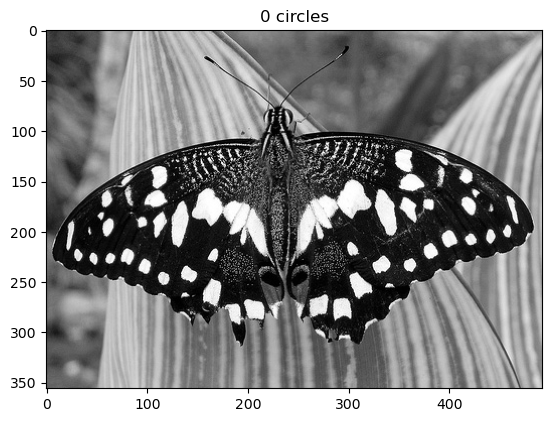

In [86]:
print(x_coordinates)
print(y_coordinates)
print(radii)

show_all_circles(images[0],x_coordinates, y_coordinates, radii)